<a href="https://colab.research.google.com/github/liofval/GCI/blob/main/GCI%E3%83%98%E3%82%99%E3%83%BC%E3%82%B7%E3%83%83%E3%82%AF_%E6%BC%94%E7%BF%92_%E5%88%86%E9%A1%9E%E3%82%B3%E3%83%BC%E3%82%B9_%E3%83%AC%E3%83%98%E3%82%99%E3%83%AB%EF%BC%91.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **分類コース**


---


分類コースでは、**データのカテゴリーを予測する機械学習モデル「決定木」**を取り扱い、**「データの理解→データの前処理→モデルの構築・評価」**という一連の流れを通して、各レベルに応じてデータ分析に必要な知識の習得を目指します。

#レベル１（★☆☆☆☆）


---


レベル１では、レベル０で学んだ内容をより実践的なデータに適用し、データの前処理の方法について学びます。まず、データの理解ではデータの中身を確認していきます。その知見を踏まえ、データの前処理とモデルの構築・評価を実践しましょう。

##1.1.データの理解①

それでは、今回扱うデータの理解をしていきます。データの理解は、その後のデータの加工と構築に重要な手続きです。今回のデータでは、毒キノコの外観（色や模様）に関するデータを扱います。

まず、下記のリンクから「毒キノコの外観データ」をダウンロードしてください。下記の青字にマウスのカーソルを合わせてクリックしてリンク先に飛び、ダウンロードボタンをクリックしてください。ダウンロードボタンが見つからない場合は、「︙（その他の機能）」をクリックし、ダウンロードボタンを探してください。


[毒キノコの外観データ.csv](https://drive.google.com/file/d/18oIhPQ4iOYoVolKMjzt1Kyek0x_WhSEW/view?usp=drive_link)

ダウンロードできたら、レベル0で扱ったファイルにある「ストレージにアップロード」をクリックしてダウンロードしたファイルを指定するか、または、ドラッグ＆ドロップ（ファイル上でマウスをクリックしたまま移動）し、アップロードしてください。毒キノコデータのCSVファイルを所定の位置にアップロードできたら、下記のコードセルを実行し、ファイルを読み込んでみましょう。

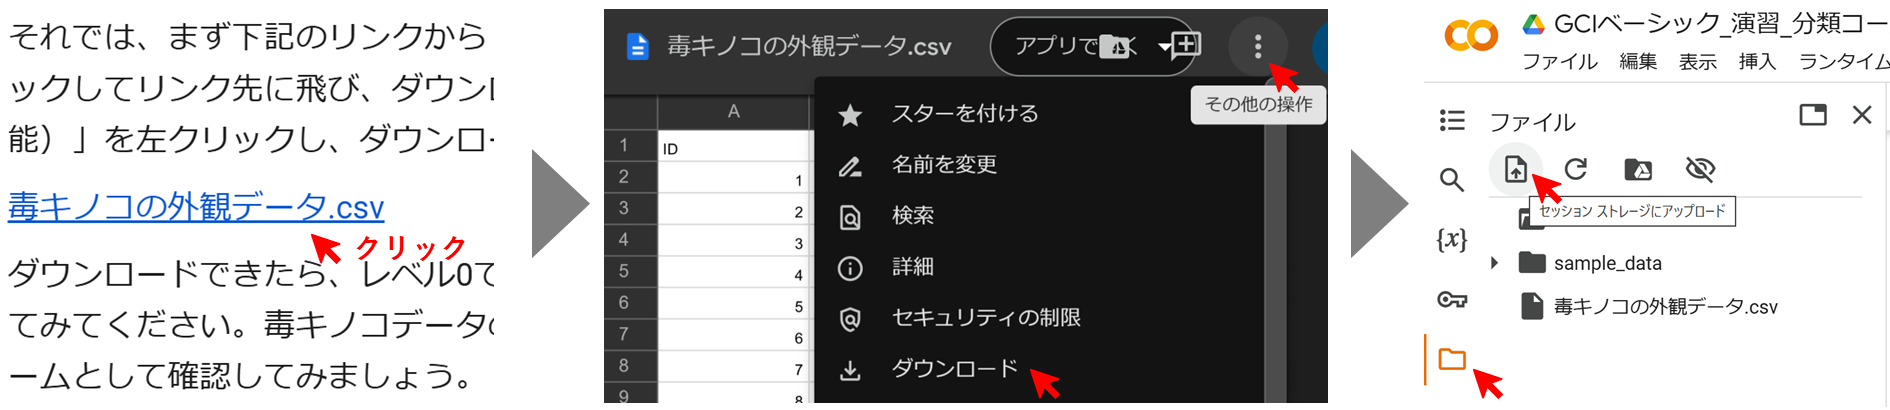

In [ ]:
#pandasのインポート
import pandas as pd

#csvファイルの読み込み
df = pd.read_csv('毒キノコの外観データ.csv')

pandasのread_csv関数で読み込んで返されるDataFrameオブジェクトを変数dfに代入しています。さらに、len関数を使用することで、データの件数を確認できます。

In [ ]:
#データフレームの行数を確認
len(df)

今回扱うデータは、UC Irvine Machine Learning Repositoryで公開されているデータを学習用に加工しています。（
http://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data
）

データが8千件近くあるため、前回のレベルで見たように、一つずつデータを確認するには膨大な量であり、理解するのも容易ではありません。まず、十件程度のデータを直接確認し、その後、各特徴量について調べていきましょう。DataFrameオブジェクトのheadメソッドを使用すると、先頭の複数行のデータを表示できます。かっこ内で引数として渡す数で表示させる行数を指定できます。行数を指定しないデフォルトでは、5行分のデータが表示されます。末尾から任意の件数を表示させたい場合は、tailメソッドを使用します。

In [ ]:
#先頭から指定行数（10）を表示
df.head(10)

表示結果から「bruises（斑点）」と「cap_color（カサの色）」の特徴量が確認できます。今回は、この質的データを基に、正解ラベルである毒（poison）の有無を予測するモデルを構築します。IDは、前回同様にキノコの識別番号であり、特徴量ではありません。bruisesとpoisonはともにYesかNoの頭文字で表しています。cap_colorはさまざまな色があり、小文字のアルファベット1文字に省略しています。記号の意味はのちほど確認します。これまでになかった点としてbruisesの列に、「NaN」と書かれているのがわかります。**NaNは、「Not a Number」の略**であり、非数と呼ばれる特殊な値です。読み込んだファイル内にデータがない箇所があると、pandasでは代わりにNaNという値で埋められます。アップロードしたcsvファイルをダブルクリックで開いてみると、NaNの箇所が空欄となっているのが確認できます。

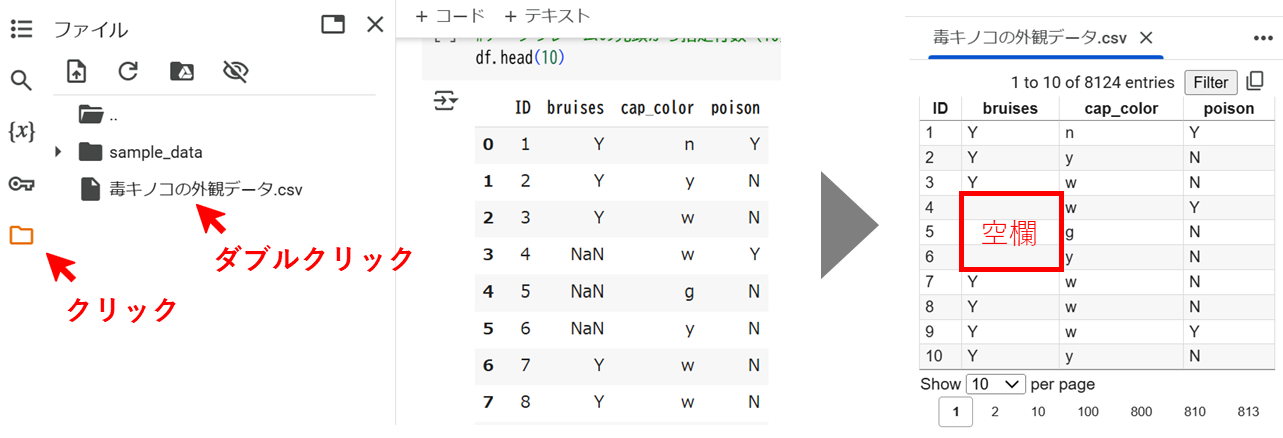

それでは、まず、cap_colorの種類についてみていきます。まずレベル０で紹介した方法でDataFrameオブジェクトからcap_color列を抽出します。DataFrameオブジェクトから1つの列を抽出するSeriesオブジェクトが得られることをレベル０で学びました。Seriesオブジェクトを代入した変数cap_color_seのuniqueメソッドを呼び出すと、その列に含まれる種類が分かります。なお、列の抽出とuniqueメソッドは、変数への代入を介さずに連続して書けます。コードは前から順に列を抽出・種類の確認を順次しており、変数の代入以外で実際の処理は同じとなります。このようにプログラミングでは連続して書くことが多いため、実際の挙動が理解しにくくなることがありますが、前から順に処理されているイメージを持つことでコードが理解しやすくなります。

In [ ]:
#色の種類を確認①

#列の抽出
cap_color_se = df['cap_color']
cap_color_unique = cap_color_se.unique()
print(cap_color_unique)

#色の種類を確認②
print(df['cap_color'].unique())

10種類の色が含まれているとわかります。略称の各色の意味は以下の表のようになっています。


| 略称  | 色名 ||
|-----|------|----|
| n | ブラウン |<font color = "brown">●</font>
| y | イエロー |<font color = "yellow">●</font>
| w | ホワイト |<font color = "white">●</font>
| g |グレー |<font color ="grey">●</font>
| p | ピンク |<font color ="pink">●</font>
| b | バフ |<font color ="#cfab72">●</font>
| u | パープル|<font color = "purple">● </font>
| c | シナモン |<font color = "#b6710d">● </font>
| r | グリーン |<font color = "green">●</font>
| e |レッド |  <font color = "red">●</font>

次に欠損値について、調べます。データの確認において、データの特徴を理解するのも重要ですが、実務上必ず必要なのが欠損値の確認です。**欠損値**とは、何らかの理由で、値が記録されておらず、存在しない状態を指します。つまり、先ほど確認したNaNの箇所に相当します。欠損値がある状態では、モデルを学習できないため、初めて扱うデータでは、まず、欠損値があるかを確認し、欠損値がある場合は適切な処理が必要になります。さきほど、bruises列にNaN（欠損値）を確認できましたが、他の特徴量にも欠損値があるのか、また、どれくらいあるのかはわからないため、調べる必要があります。DataFrameオブジェクトの`isnull`メソッドを使用すると、各データごとに欠損値の有無を論理値（TrueかFalse）で表したDataFrameオブジェクトが返ってきます。

In [ ]:
#欠損値の有無を確認
df_isnull = df.isnull()
df_isnull.head(10)

さらに`sum`メソッドを使用すると、Trueは1、Falseは0として扱われ、欠損値であるTrueの数を各列で合計したSeriesオブジェクトが返され、各列の欠損値の数を確認できます。元の各列名（IDとbruises、cap_color、poison）がインデックスとなっています。

In [ ]:
#各列の欠損値の数を確認
df_isnull.sum()

欠損値は、buruisesの列にのみ存在し、1624件あることが分かりました。

なお、段階的に説明するために、DataFrameオブジェクトのisnullメソッドの返り値となるDataFrameオブジェクトを一度変数に保持してからsumメソッドを使用しましたが、連続して呼び出すこともできます。以後、欠損値の確認時はこちらのコードを使用します。

In [ ]:
df.isnull().sum()

##1.2. データの前処理①

次は、データの前処理をしていきます。今回、特徴量が質的データのため、ダミー変数化が必要です。また、これまでになかった欠損値の処理も必要になります。

欠損値処理の方法として、欠損値の削除と補完があります。今回のレベル1では、欠損値の削除について学び、次のレベル2では、欠損値の補完について扱います。

**【欠損値処理】**

*   欠損値の削除（レベル１★☆☆☆☆）
    *   欠損列の削除
    *   欠損行の削除
*   欠損値の補完（レベル２★★☆☆☆）

今回のデータでは、欠損値があったのは、bruisesの列だけでしたので、bruisesの列を削除して、モデルを学習させましょう。削除といっても、特別な処理は必要なく、bruisesの列を使わず、cap_colorだけをダミー変数化して学習データに利用するだけです。ダミー変数化の仕方はこれまでどおりです。

In [ ]:
df_dummy = pd.get_dummies(df['cap_color'], drop_first= True, dtype = int)
df_dummy.head()

これまでのダミー変数化では、YesかNoの2値であったため、ダミー変数化後は1列だけでしたが、今回は10種類のため、9列になっています。各列をFalse（0）かTrue（1）にしているため、列数が増えます。色の種類を0，1，2…9とすることもできますが、機械学習モデルは、数値の大小関係も特徴として学習する可能性もあります。今回の色の種類は、大小関係のない記号であるため、各列に分けて0と1にしています。

今回もレベル0と同じく決定木を用いた分類モデルを構築します。モデル構築と評価は、前回とほとんど同じ作業になります。レベル0では、全データでモデルを学習させ、同じデータでモデルの予測精度を評価しました。しかし、これでは、未知のデータを予測できるかは評価できません。本来の目的は、モデルを構築した後、未知データの予測にあります。未知データの予測精度を評価する方法に、**ホールドアウト法**があります。ホールドアウト法は、全データを学習に使用するのではなく、データを学習用（**訓練データ**）と評価用（**テストデータ**）に分けます。そして、訓練データのみでモデルを学習させ、モデルの学習に使用しないテストデータで予測精度を評価します。試験勉強のために過去問を使用する際に、全ての過去問と解答を見て勉強するのではなく、一部の過去問は、最後にとっておいて、勉強後の理解度確認テストとして利用するのに似ています。

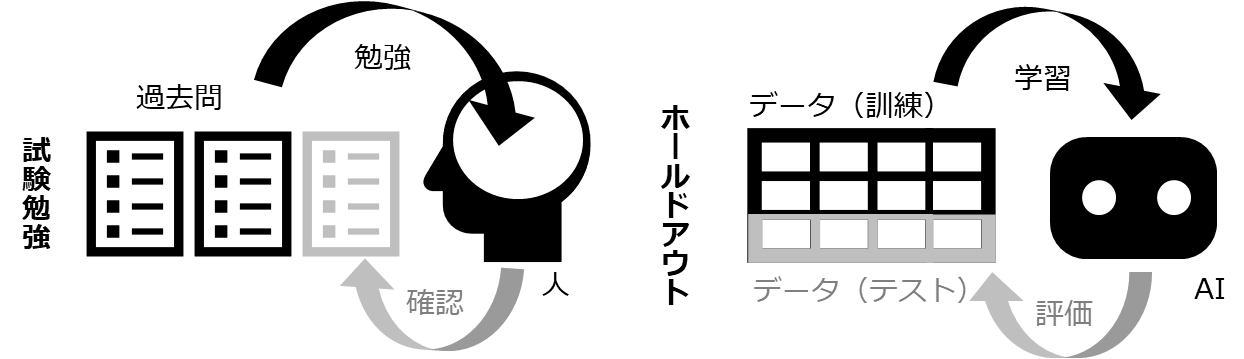

>**[検証用データ]**
>
>ホールドアウト法は、データを分割して学習・評価する方法と紹介しましたが、実践場面では、訓練データをさらに、学習用（訓練データ）と検証用（検証データ）に分けることが多いです。モデル構築において、事前にモデルに設定する値のハイパーパラメータ（決定木の場合：乱数や木の深さ、不純度の計算式）も予測精度に寄与します。テストデータで予測精度が上がるようにいろいろハイパーパラメータを調整してしまうと、現在あるテストデータにのみ最適化したモデルが構築される可能性があるため、ハイパーパラメータの選択を検証するための検証用データを作ります。これは、教科書の問題が「学習データ」、模擬試験が「検証データ」、本番の試験が「テストデータ」に例えられます。教科書の問題を丸暗記しても、模擬試験の傾向に合わせて学習しても、必ずしも本番の試験で良い結果が得られるかどうかはわからないためです。そのため、モデルのより信頼のある精度評価として、データを3つに分割したホールドアウト法が取られます。今回の演習では、入門ということもあり、テストデータに合わせたモデルのハイパーパラメータ調整をせずにデフォルト値のまま、訓練データとテストデータの2つだけでモデルの構築・評価をします。

ホールドアウト法は、scikit-learnのtrain_test_split関数の使用で容易に実装できます。train_test_split関数に引数（特徴量, 正解ラベル）を渡して呼び出すと、［特徴量（訓練データ）, 特徴量（テストデータ）, 正解ラベル（訓練データ）, 正解ラベル（テストデータ］のリストが返されます。そのままリストとして変数に代入してもよいですが、それぞれのデータを分けて変数に代入するアンパック代入が便利です。アンパック代入は、リストの要素数分の変数名を用意し、リストを代入すると各要素が各変数に分けて代入されます。以下に簡単な例を示します。

>**[リストのアンパック代入例]**
>
>```Python
list_data = [1,2,3,4]
a, b, c, d = list_data
```
aには1、bには2、cには3、dには4が代入されます。


それでは、scikit-learnのmodel_selectionからtrain_test_split関数をインポートし、ダミー変数化した特徴量とラベルを渡して、訓練データとテストデータに分割してみましょう。

>**[train_test_split]**
>
>```Python
特徴量（訓練データ）の変数名, 特徴量（テストデータ）の変数名, ラベル（訓練データ）の変数名, ラベル（テストデータ）の変数名
= train_test_split(特徴量のデータフレーム, ラベルのシリーズ,test_size = テストデータの割合（0から1の間を指定）)
```
test_sizeは省略可。指定しない場合、デフォルトでtest_size = 0.25

分割した訓練データを用いて決定木モデルを構築してみましょう。モデルの構築過程は、レベル０のときと同じです。

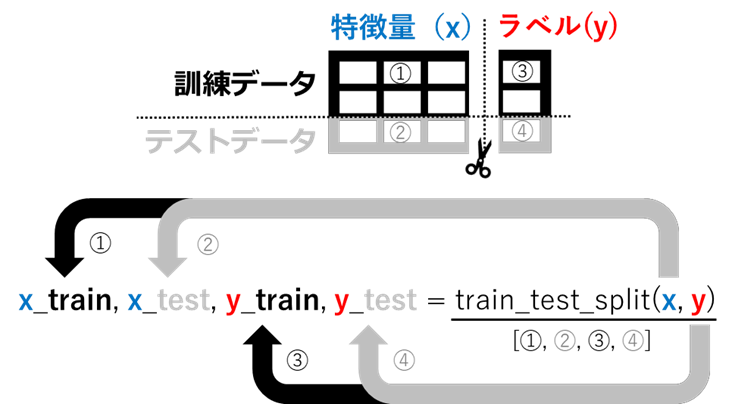

In [ ]:
#scikit-learnのmodel_selectionからtrain_test_split関数をインポート
from sklearn.model_selection import train_test_split

x = df_dummy
y = df['poison']

x_train, x_test, y_train, y_test = train_test_split(x, y)

print('分割前のデータ数', len(df))
print('訓練データ数：', len(x_train))
print('テストデータ数：', len(x_test))
print('テストデータの割合：',len(x_test)/len(df))

デフォルトでは、25％がテストデータとなるようになっていますが、train_test_split関数にtest_size = 0.3として引数を指定すると30％となるように変更できます。print関数のかっこ内にカンマを挟んで複数の値を引数として渡すと、スペースに変わって表示されます。

##1.3.モデルの構築と評価①

In [ ]:
#モデルの構築（インポート➤インスタンス化➤訓練データでの学習）
from sklearn.tree import  DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

以上でモデルの学習が終了しました。それでは、レベル０でも登場したscoreメソッドを使用してモデルの評価をします。前回は、学習に使用したデータと同じデータで評価しましたが、今回は、学習に使用した訓練データでの正解率と学習に含まれないテストデータでの正解率の両方を出してみましょう。なお、学習データに対する予測誤差を訓練誤差、テストデータに対する予測誤差を汎化（はんか）誤差と呼びます。数値は、round関数を使用して小数点以下を3桁までに丸め込むようにしています。round関数は、1つ目の引数に丸め込む数値、2つ目の引数に桁数を入力して丸め込むPythonの組み込み関数です。

In [ ]:
train_score = model.score(x_train, y_train)
test_score = model.score(x_test, y_test)
print('訓練データに対する正解率',round(train_score, 3))
print('テストデータに対する正解率', round(test_score, 3))

結果、訓練誤差と汎化誤差は同程度であり、未知のデータも対応できるようになっていることが分かります。正解率は6割となりました。今回は毒キノコか食用キノコかの2値分類であるため、無作為に適当に選んで決める場合では半分程度の正解率であり、それより高いことから無作為よりかは予測できていることが分かります。なお、毒キノコの割合も正解率を考える上で重要になります。なぜなら、仮に毒キノコが1割しか含まれていない場合、全てのキノコを食用キノコと答えても9割正解となるからです。今回の毒キノコの数を確認してみましょう。種類だけでなく数も知りたいときは、データフレームの列を指定し、value_countsメソッドを使用します。なお、列指定とメソッド呼び出しを下では、異なる行に分けて記載していますが、`df['poison'].value_counts()`と連続して1行で記載することもできます。

In [ ]:
se_poison = df['poison']
se_poison.value_counts()

今回は、毒キノコ（Y)と食用キノコ（N）がほとんど同数であったため、問題ありませんでしたが、データに偏りがある場合は、評価方法やモデルの学習方法を工夫する必要があります。そのため、正解ラベル（毒キノコの有無）の割合は、最初のデータの理解のときにするのが通常の流れとなります。

##1.4. データの理解②

欠損値の列（bruises）を削除してモデルを学習した先ほどの結果では、予測が6割程度でした。試験で6割であれば合格となる場合もありますが、今回はより高い正解率を目指します。前回は、列を全て削除しましたが、実際に欠損値があるのは約8千件のうち、千件程度でしたので、7千件を使用していないことになります。また、斑点（bruises）が毒キノコ予測に有用な場合、モデルの学習に取り入れた方がより高い精度が期待できます。それでは、斑点の有無で、有毒キノコの数がどれくらい変わるか見てみましょう。数を数える方法はさきほどのvalue_countsメソッドでできますが、2つの列を基準にするため、bruisesとpoison列を抽出したDataFrameオブジェクトに対して、value_countsメソッドを適用してみます。斑点と毒の有無のある組み合わせが登場する回数が計算されますが、欠損値は計算に含まれません。

In [ ]:
se_b_p_counts = df[['bruises','poison']].value_counts()
se_b_p_counts

表示結果から、bruisesのYes/NoとpoisonのYes/Noの4種類の数が確認できます。毒の数を調べたときのSeriesオブジェクトの表示結果と少し変わっているのが分かります。今回は、2列のDataFrameオブジェクトに対してvalue_countsメソッドを呼び出したため、2重のインデックスを持つSeriesオブジェクトとなっています。このような複数のインデックスは、多重インデックス（階層型インデックス）と呼ばれます。index属性で確認すると、2列のインデックスとその名前が確認できます。

In [ ]:
se_b_p_counts.index

value_countsメソッドによって返ってくるSeriesオブジェクトの数値は、大きいもの順に並んでいます。表をインデックス順に並び直すには、sort_indexメソッドを使用します。なお、2重インデックスの場合、左の1層目を基準に並べた後に、右の2層目を基準に並べかえた、Seriesオブジェクトが返ってきます。

In [ ]:
#Seriesオブジェクトのindexの並び替え
se_b_p_counts = se_b_p_counts.sort_index()
se_b_p_counts

2重のインデックスのうち角かっこ（`[ ]`）を使って1層目のインデックスを指定すると、これまでのようなSeriesオブジェクトの表示結果と同じになります。以下のコードセルでは、bruisesのNを選択してpoisonの有毒キノコ（Y）と食用キノコ（N）の数を表示しています。

In [ ]:
se_b_p_counts['N']

さらにindex属性を確認すると、今回は1列のインデックスとなっているのが確認できます。

In [ ]:
se_b_p_counts['N'].index

今回は、数値の数が少ないので表からでも斑点と毒の数の特徴が分かりますが、グラフ化するとより確認しやすくなります。それでは、グラフ化に便利なライブラリであるmatplotlibを活用してみましょう。matplotlibの中にあるpyplotと呼ばれるプログラムファイルにはグラフ化に使用できる関数が多くあります。pyplotは、pltという名前でインポートするのが慣習となっています。

In [ ]:
import matplotlib.pyplot as plt

今回は、bruiseがN（斑点なし）のときとbruiseがY（斑点あり）のときで、キノコの有毒・無毒数を比べたいと思います。このような数の比較には棒グラフが適用できます。棒グラフは、pltの中のbar関数を使用します。1つ目の引数にはインデックス、2つ目の引数には棒の高さとなる数を入力します。今回は、2つの棒グラフを縦に並べた**積み上げ棒グラフ**として可視化するために、斑点ありの棒グラフのbottom引数に斑点なしのときの棒の高さを入力しています。

In [ ]:
#bruiseがN（斑点なし）のときの有毒・無毒数を棒グラフで表示）
plt.bar(se_b_p_counts['N'].index, se_b_p_counts['N'])
#bruiseがY（斑点あり）のときの有毒・無毒数を棒グラフで表示
plt.bar(se_b_p_counts['Y'].index, se_b_p_counts['Y'], bottom = se_b_p_counts['N'])

下側の<font color = "#1F77B4">青色の棒グラフは斑点なし</font>のとき、上側の<font color = "#FF7F0E">オレンジ色の棒グラフは斑点あり</font>のときの有毒Y・無毒Nの数を示しています。斑点なしの方が有毒数が多く、斑点ありの方が無毒数が多いという異なる傾向が確認できます。以上から斑点の有無は、毒キノコの予測に有用な特徴量となると考えられます。そこで、次に斑点の欠損値を除いたデータでモデルの構築をしてみましょう。

##1.5.データの前処理②

欠損値のあるデータを削除するには、DataFrameオブジェクトのdropnaメソッドを使用します。dropnaメソッドを使用すると欠損値を1つでも含む行データを削除したDataFrameオブジェクトが返されるため、新たにdf_dropという変数に代入しています。df_dropに代入したデータを確認すると欠損値がなくなっているのが分かります。

In [ ]:
#欠損値のある行データを削除
df_drop = df.dropna()

#欠損値の数を確認
df_drop.isnull().sum()

なお、dropnaメソッドでは、元のDataFrameオブジェクト自体からは欠損値は除かれません。元の変数dfでisnullメソッドを使用すると欠損値が確認できます。

In [ ]:
#元のデータフレームの欠損値の確認
df.isnull().sum()

In [ ]:
print('削除前のデータ数', len(df))
print('削除後のデータ数', len(df_drop))

欠損値のある千件程度が削除され、df_dropに欠損値がなくなっていることが確認できます。それでは、df_dropのcap_color列とbruises列の両方を使用し、これまでどおりダミー変数化してみましょう。さらに、訓練データとテストデータに分けましょう。

In [ ]:
x = pd.get_dummies(df_drop[['cap_color', 'bruises']], drop_first= True)
y = df_drop['poison']

x_train, x_test, y_train, y_test = train_test_split(x, y)

##1.6.モデルの構築と評価②

それでは、訓練データでモデルを学習させ、テストデータで正解率を評価してみましょう

In [ ]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
test_score = model.score(x_test, y_test)
round(test_score,3)

8割の正解率が得られるようになりました。より多くのデータを活用したことで、正解率が向上しました。しかし、いつでもこのようになるかは、試してみるまでわかりません。また、欠損値のあるデータ列を削除して学習したモデルは、今後現れる未知のデータに欠損値が含まれていても対応できますが、欠損値のある行データを削除して学習したモデルは、未知のデータに欠損値が含まれていると対応できないというデメリットもあります。欠損値を削除するかどうかは、分析課題を解く上で欠損値のあるデータが重要かという視点が重要です。欠損値を適切な値で補完できれば、未知のデータに欠損値が含まれていても対応できます。次回は、欠損値を削除するのではなく、欠損値に適切な値を代入する欠損値補完の方法について学びます。

>**[正解率は何％がよい？]**
>
>正解率は何％以上がよいのでしょうか。本演習では、全てのレベルを終えるまでに、正解率が100％近くになるよう目指します。しかし、実践的なデータにおいて、正解率を上げるには、モデルのハイパーパラメータ調整や決定木以外のモデル選択の検討、データの特徴量エンジニアリングなど、さまざまな工夫の繰り返しが必要であり、時間とコストがかかります。ビジネスで利用する場合、その正解率で予測に使用すれば、どれくらいコスト削減・利益上昇につながるか定量的に評価し、その結果、100％でなくとも十分な場合があります。また、いったんモデルを構築し、実運用しながら間違えたデータなどを蓄積し、モデルの改善に活用するといった方法もあります。



##1.7.演習問題

問1-1.下記リンクの「分類コースLv1演習データ.csv」をダウンロードしてファイルをアップロードし、pandasのデータフレームとして読み込んでください。読み込んだデータの最初の5行のデータを表示して確認してください。

[分類コースLv1演習データ.csv](https://drive.google.com/file/d/1Hn5ql5e1apq8JFh8VitXEG_s4wb9V0ar/view?usp=drive_link)



問1-2.上の問題で読み込んだデータフレームを利用し、欠損値の数を列ごとに確認してください。

問1-3.上の問題で読み込んだデータフレームの2列目（カラム名はcolumns2）には何種類のデータがあるか確認してください。

問1-4.上の問題で読み込んだデータフレームの欠損値のある行を削除したデータフレームを作成してください。